# Observation of a charge-neutral muon polaron complex in antiferromagnetic Cr$_2$O$_3$
## Supplemental material: Convergence tests of the plane wave cutoff and k-point sampling

M. H. Dehn$^{1, 2, 3}$ J. K. Shenton$^{4,*}$ S. Holenstein$^{5,6}$ Q. N. Meier$^4$ D. J. Arseneau$^3$ D. L. Cortie$^{1, 2, 7, †}$ B. Hitti$^3$ A. C. Y. Fang$^{1, ‡}$ W. A. MacFarlane$^{2, 3, 7}$ R. M. L. McFadden$^{2, 7}$ G.
D. Morris$^3$ Z. Salman$^6$ H. Luetkens$^6$ N. A. Spaldin$^4$ M. Fechner$^{4, 8}$ and R. F. Kiefl$^{1, 2, 3}$


$^1$Department of Physics and Astronomy, University of British Columbia, Vancouver, BC V6T 1Z1, Canada    
$^2$Stewart Blusson Quantum Matter Institute, University of British Columbia, Vancouver, BC V6T 1Z4, Canada    
$^3$<span style="font-variant:small-caps;">Triumf</span>, Vancouver, BC V6T 2A3, Canada   
$^4$Department of Materials, ETH Zürich, CH-8093 Zürich, Switzerland   
$^5$Physik-Institut der Universität Zürich, CH-8057, Zürich, Switzerland   
$^6$Laboratory for Muon Spin Spectroscopy, Paul Scherrer Institut, 5232, Villigen PSI, Switzerland   
$^7$Department of Chemistry, University of British Columbia, Vancouver, BC, V6T 1Z1, Canada    
$^8$Max Planck Institute for the Structure and Dynamics of Matter, 22761 Hamburg, Germany   
$^†$ Present address: Institute for Superconducting and Electronic
Materials, Australian Institute for Innovative Materials, University of Wollongong, North Wollongong, NSW 2500, Australia    
$^‡$ Present address: Department of Physics, Simon Fraser University, Burnaby, Canada V5A 1S6




$^*$ For queries about the supplemental information in this notebook contact [J. Kane Shenton](mailto:john.shenton@mat.ethz.ch).

---


Here we investigate the convergence of total energies, forces and energy differences between the antiferromagnetic (AFM) and ferromagnetic (FM) magnetic orderings in Cr$_2$O$_3$. 

We simply run a series of calculations at increasing plane wave cutoff or number of k-points and compute the energy and forces, keeping the structure fixed. This was done here for the LDA functional, with a Hubbard U of 4 eV added to the Cr $d$ orbitals. We used [ASE](https://wiki.fysik.dtu.dk/ase/index.html) to setup and run the calculations and use [pymatgen](https://pymatgen.org) to parse in the results. 

## Setup 

In [22]:
import numpy as np

from ase.io import read, write
from pymatgen.io.vasp import Vasprun

import matplotlib.pyplot as plt

%matplotlib notebook

In [23]:
import matplotlib as mpl
print(mpl.style.available)
mpl.style.use('seaborn-poster')

['fast', 'seaborn-white', 'seaborn-ticks', 'bmh', 'seaborn-paper', 'dark_background', 'seaborn-pastel', 'seaborn-dark', 'grayscale', 'seaborn-notebook', 'tableau-colorblind10', 'ggplot', 'seaborn-deep', '_classic_test', 'fivethirtyeight', 'seaborn-dark-palette', 'seaborn', 'classic', 'seaborn-muted', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-darkgrid', 'seaborn-whitegrid', 'seaborn-talk', 'Solarize_Light2', 'seaborn-poster']


## ENCUT: Plane wave cutoff energy

### AFM - read in results

In [24]:
encut_runs = []
for e in range(300, 950, 100):
    label = 'convergence_tests/afm_encut/encut-{0:03d}-vasprun.xml'.format(e)

    run = Vasprun(label, parse_potcar_file=False)
    encut_runs.append(run)
    print("ENCUT: {:5.1f} eV, Total energy:  {}".format(e, run.final_energy))
    
# Store the total energies in an array:
totens = np.array([run.final_energy for run in encut_runs])

ENCUT: 300.0 eV, Total energy:  -84.30263676 eV
ENCUT: 400.0 eV, Total energy:  -86.7417392 eV
ENCUT: 500.0 eV, Total energy:  -86.65388517 eV
ENCUT: 600.0 eV, Total energy:  -86.73667418 eV
ENCUT: 700.0 eV, Total energy:  -86.78963031 eV
ENCUT: 800.0 eV, Total energy:  -86.80155359 eV
ENCUT: 900.0 eV, Total energy:  -86.80139301 eV


In [25]:
# Extract the maximum force in meV/Å
maxforces_afm = [1000*np.linalg.norm(run.ionic_steps[-1]['forces'], axis=1).max() for run in encut_runs]
maxforces_afm = np.array(maxforces_afm)

In [26]:
# pressure in kb:
ext_pressure = [np.trace(run.ionic_steps[-1]['stress']) / 3. for run in encut_runs]
ext_pressure = np.array(ext_pressure) - ext_pressure[-1]
ext_pressure / 10. # in GPa

array([-1.59899191e+02, -6.81838224e+00, -1.45127057e+00, -1.51340919e+00,
       -4.38559266e-01, -3.03019903e-02,  0.00000000e+00])

### FM - read in results

In [27]:
fm_encut_runs = []
for e in range(300, 950, 100):
    label = 'convergence_tests/fm_encut/encut-{0:03d}-vasprun.xml'.format(e)
    run = Vasprun(label, parse_potcar_file=False)
    fm_encut_runs.append(run)
    print("ENCUT: {:5.1f} eV, Total energy:  {}".format(e, run.final_energy))
    
# Store the total energies in an array:
fm_totens = np.array([run.final_energy for run in fm_encut_runs])

ENCUT: 300.0 eV, Total energy:  -84.13125018 eV
ENCUT: 400.0 eV, Total energy:  -86.51362663 eV
ENCUT: 500.0 eV, Total energy:  -86.42709211 eV
ENCUT: 600.0 eV, Total energy:  -86.51190892 eV
ENCUT: 700.0 eV, Total energy:  -86.56550509 eV
ENCUT: 800.0 eV, Total energy:  -86.57743502 eV
ENCUT: 900.0 eV, Total energy:  -86.57725784 eV


In [28]:
# Extract the maximum force in meV/Å
maxforces_fm = [1000*np.linalg.norm(run.ionic_steps[-1]['forces'], axis=1).max() for run in fm_encut_runs]
maxforces_fm = np.array(maxforces_fm)


In [29]:
# pressure in kb:
fm_ext_pressure = [np.trace(run.ionic_steps[-1]['stress']) / 3. for run in fm_encut_runs]
fm_ext_pressure = np.array(fm_ext_pressure) - fm_ext_pressure[-1]
fm_ext_pressure / 10. # in GPa


array([-1.59582816e+02, -6.78707548e+00, -1.44000298e+00, -1.50970353e+00,
       -4.30518367e-01, -2.40484780e-02,  0.00000000e+00])

### Total energy plot

<IPython.core.display.Javascript object>


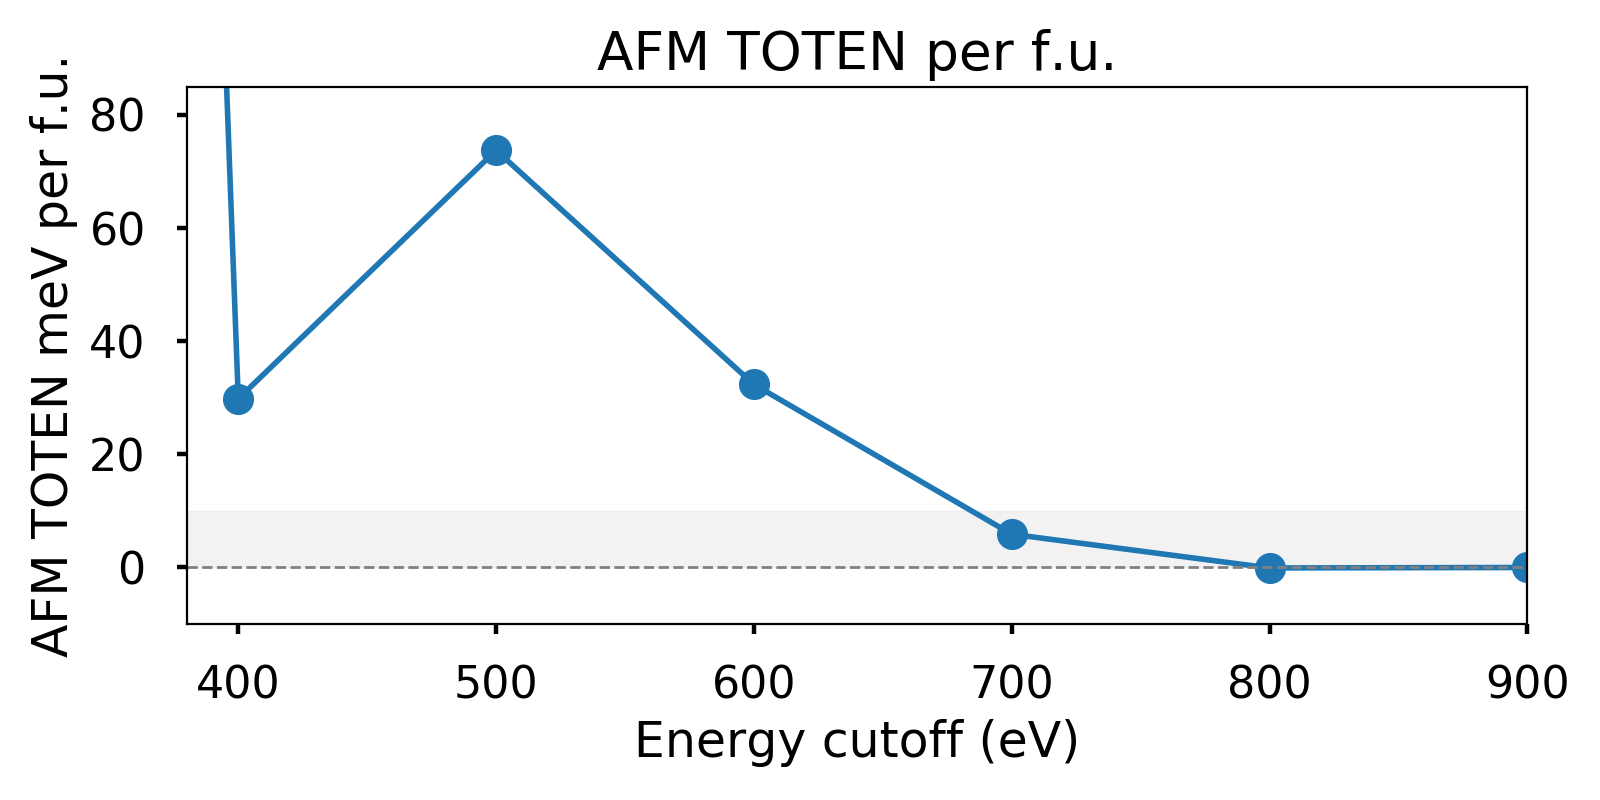

In [30]:
encuts = range(300, 950, 100)

fig = plt.figure(figsize=(8,4))
# Make the plot
plt.plot(encuts, 1000*(totens-totens[-1])/2, marker='o',
        linewidth = 2)

plt.axhline(0, linewidth = 1, color='0.5', linestyle='--')
plt.axhspan(ymin=0,ymax=10, color='0.75', alpha=0.2)

plt.xlabel(r"Energy cutoff (eV)")
plt.ylabel(r"AFM TOTEN meV per f.u.")
plt.title(r"AFM TOTEN per f.u.")
plt.xlim(380, 900)
plt.ylim(-10, 85)


plt.tight_layout()

<IPython.core.display.Javascript object>


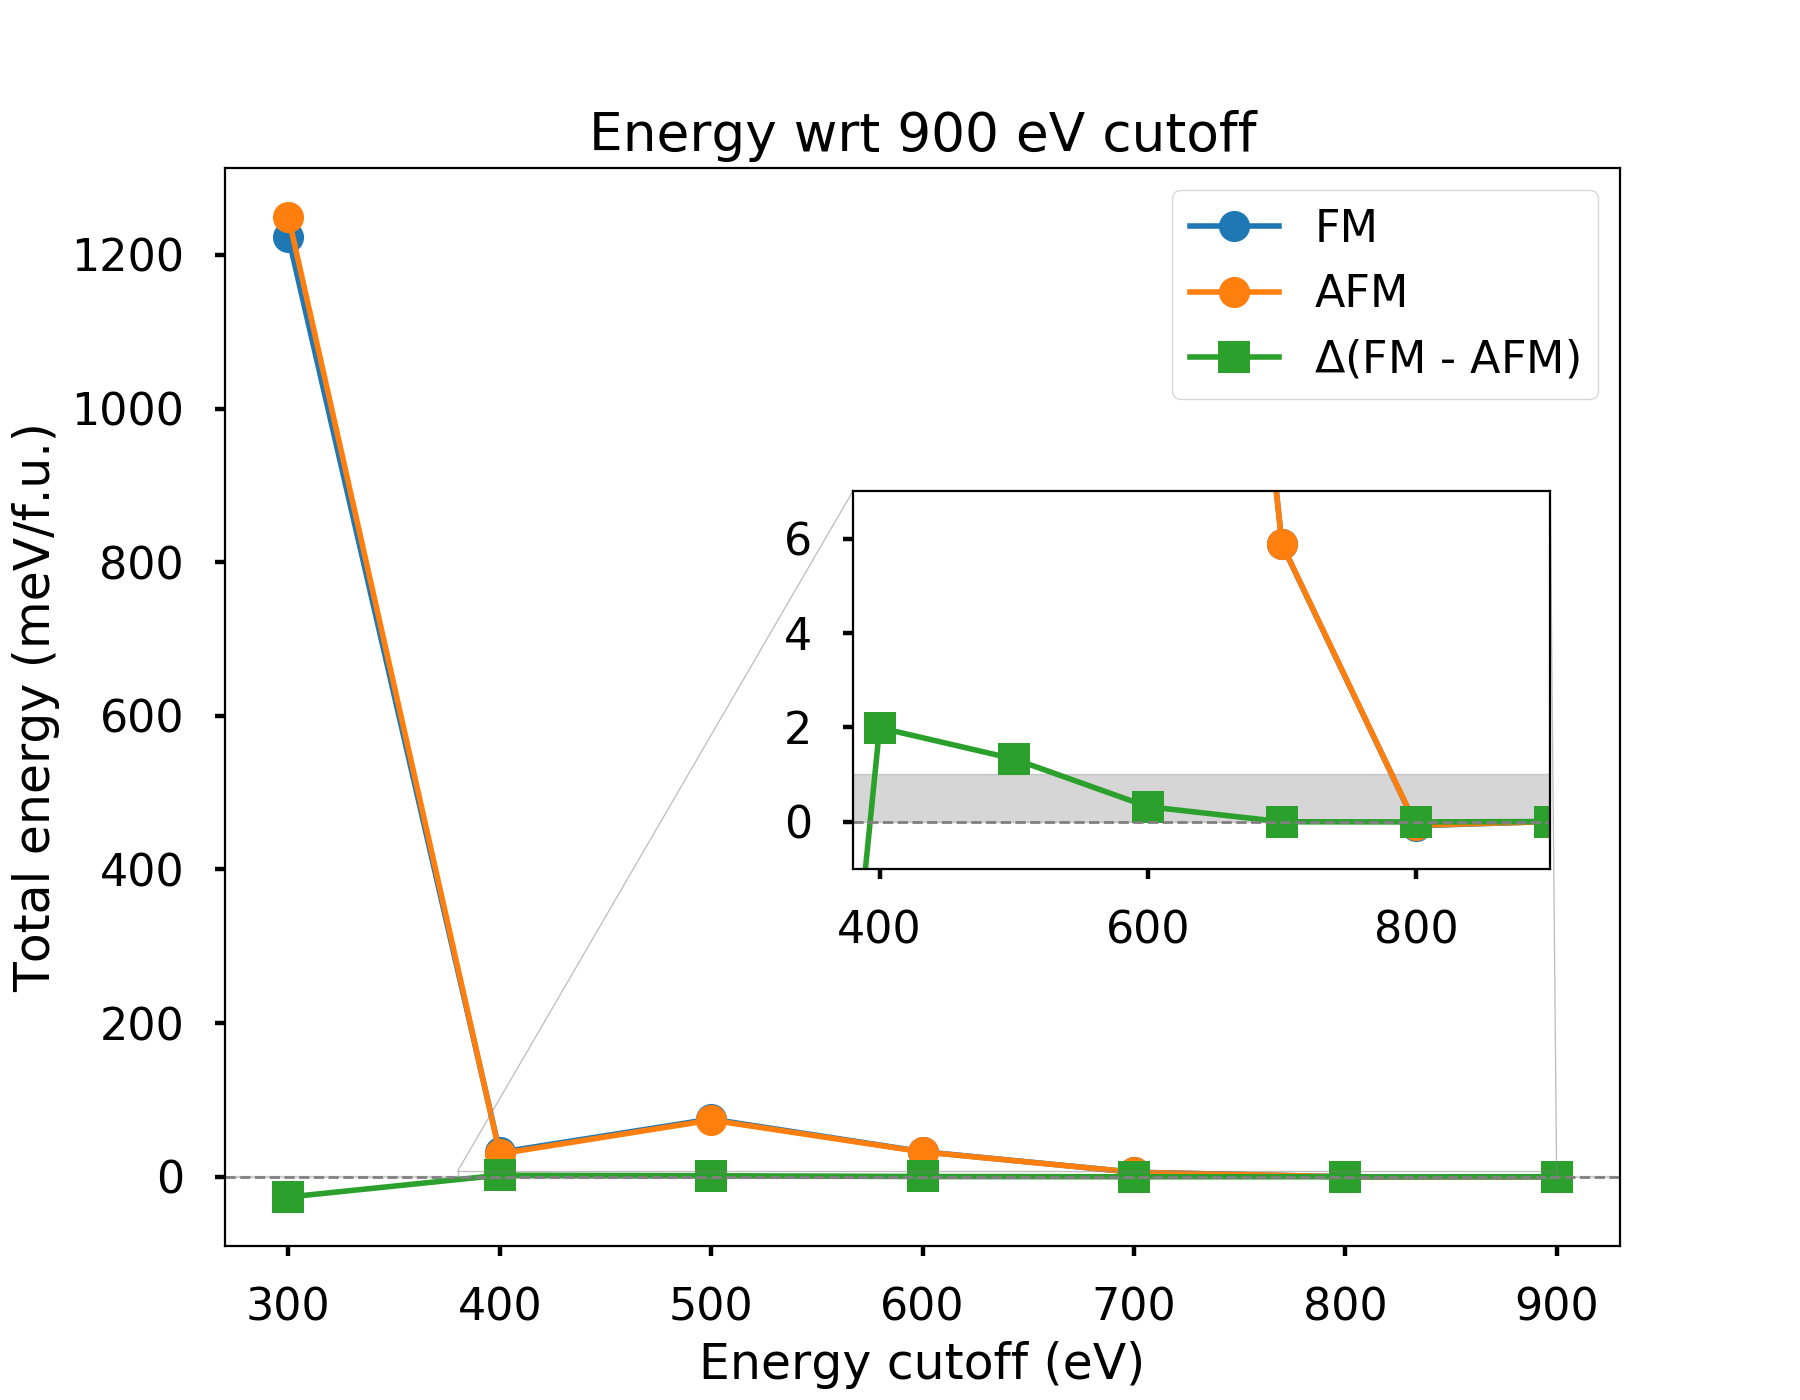

FM
 [ 1.22300383e+03  3.18156050e+01  7.50828650e+01  3.26744600e+01
  5.87637500e+00 -8.85900000e-02  0.00000000e+00]
AFM
 [ 1.24937812e+03  2.98269050e+01  7.37539200e+01  3.23594150e+01
  5.88135000e+00 -8.02900000e-02  0.00000000e+00]



In [31]:
encuts = range(300, 950, 100)

fig, ax1 = plt.subplots(figsize=(9,7))

# Make the plot
ax1.plot(encuts, 1000*(fm_totens-fm_totens[-1])/2, marker='o',
        linewidth = 2, label = 'FM')

print('FM\n', 1000*(fm_totens-fm_totens[-1])/2)
print('AFM\n', 1000*(totens-totens[-1])/2)


ax1.plot(encuts, 1000*(totens-totens[-1])/2, marker='o',
        linewidth = 2, label = 'AFM')

ax1.plot(encuts, 1000*(fm_totens-totens - (fm_totens-totens)[-1])/2, marker='s',
        linewidth = 2, label = r'$\Delta$(FM - AFM)')

ax1.axhline(0, linewidth = 1, color='0.5', linestyle='--')
ax1.axhspan(ymin=0,ymax=1.0, color='0.75', alpha=0.6)

ax1.set_xlabel(r"Energy cutoff (eV)")
ax1.set_ylabel(r"Total energy (meV/f.u.)")
ax1.set_title(r"Energy wrt 900 eV cutoff")
ax1.legend()



# inset axes....
axins = ax1.inset_axes([0.45, 0.35, 0.5, 0.35])

# Make the plot
axins.plot(encuts, 1000*(fm_totens-fm_totens[-1])/2, marker='o',
           linewidth = 2, label = 'FM')
axins.plot(encuts, 1000*(totens-totens[-1])/2, marker='o',
           linewidth = 2, label = 'AFM')
axins.plot(encuts, 1000*(fm_totens-totens - (fm_totens-totens)[-1])/2, marker='s',
        linewidth = 2, label = r'$\Delta$(FM - AFM)')


axins.axhline(0, linewidth = 1, color='0.5', linestyle='--')
axins.axhspan(ymin=0,ymax=1, alpha=0.2, color='0.2')

# sub region of the original image
x1, x2, y1, y2 = 380, 900, -1, 7
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)


ax1.indicate_inset_zoom(axins)
print()

As expected, the difference in total energies converges much more quickly than the total energies. Here we see that the energy difference between the FM and AFM magnetic orderings are converged to within 1 meV at a cutoff of 600 eV. The total energies are converged to within 6 meV at a cutoff of 700 eV ( or 35 meV at a 600 eV cutoff). 

<IPython.core.display.Javascript object>


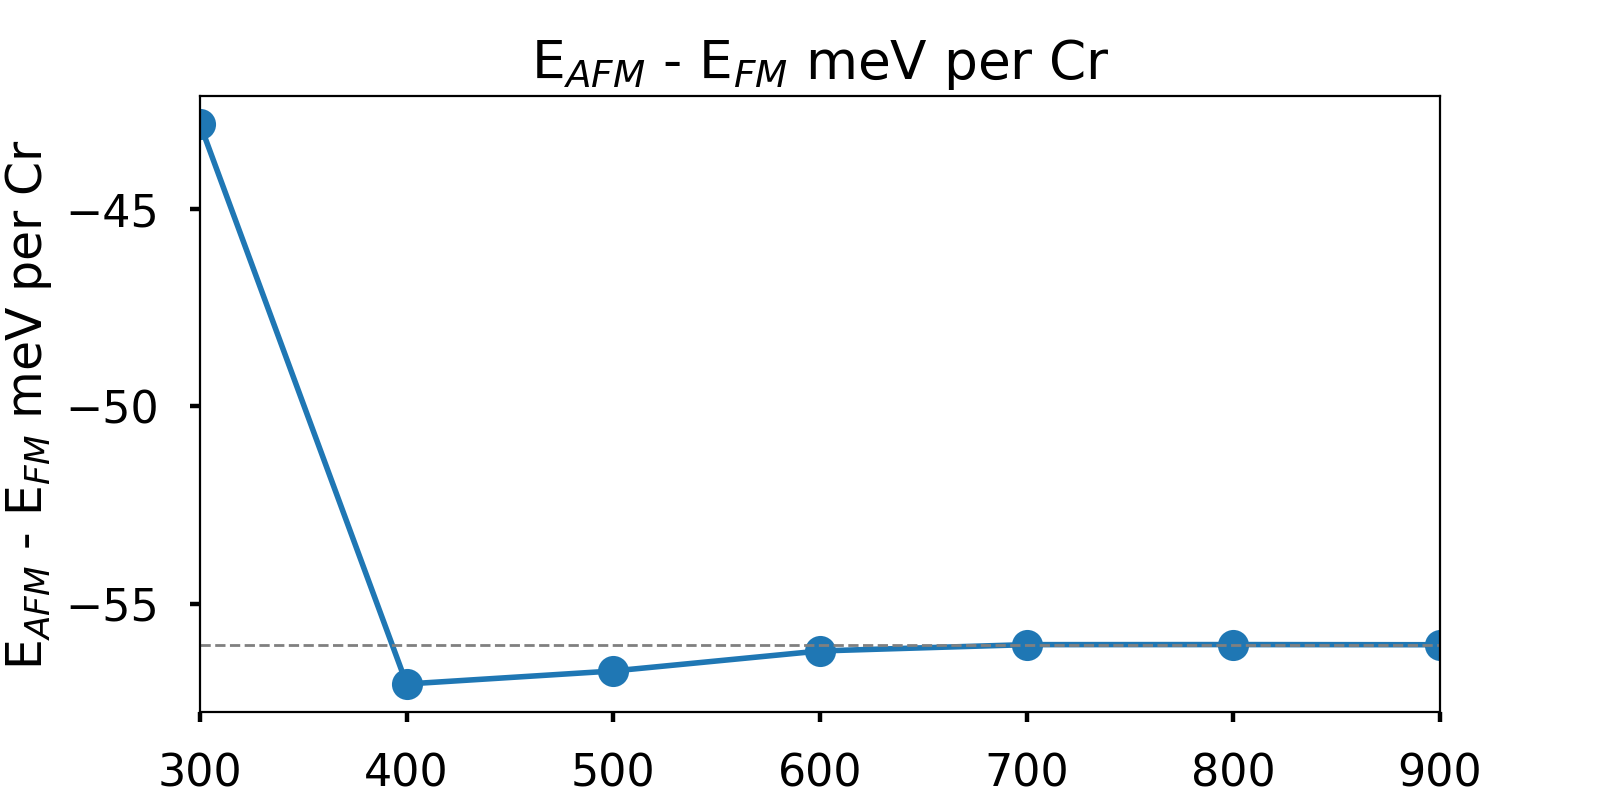

(300, 900)

In [42]:
encuts = range(300, 950, 100)
toten_diffs = totens - fm_totens

fix = plt.figure(figsize=(8,4))
# Make the plot
plt.plot(encuts, 1000*(toten_diffs)/4,
        linewidth = 2, marker='o')

plt.axhline(1000*(toten_diffs[-1])/4, linewidth = 1, color='0.5', linestyle='--')
plt.xlabel(r"Energy cutoff (eV)")
plt.ylabel(r"E$_{AFM}$ - E$_{FM}$ meV per Cr")
plt.title(r"E$_{AFM}$ - E$_{FM}$ meV per Cr")
plt.xlim(300, 900)




#### Forces

<IPython.core.display.Javascript object>


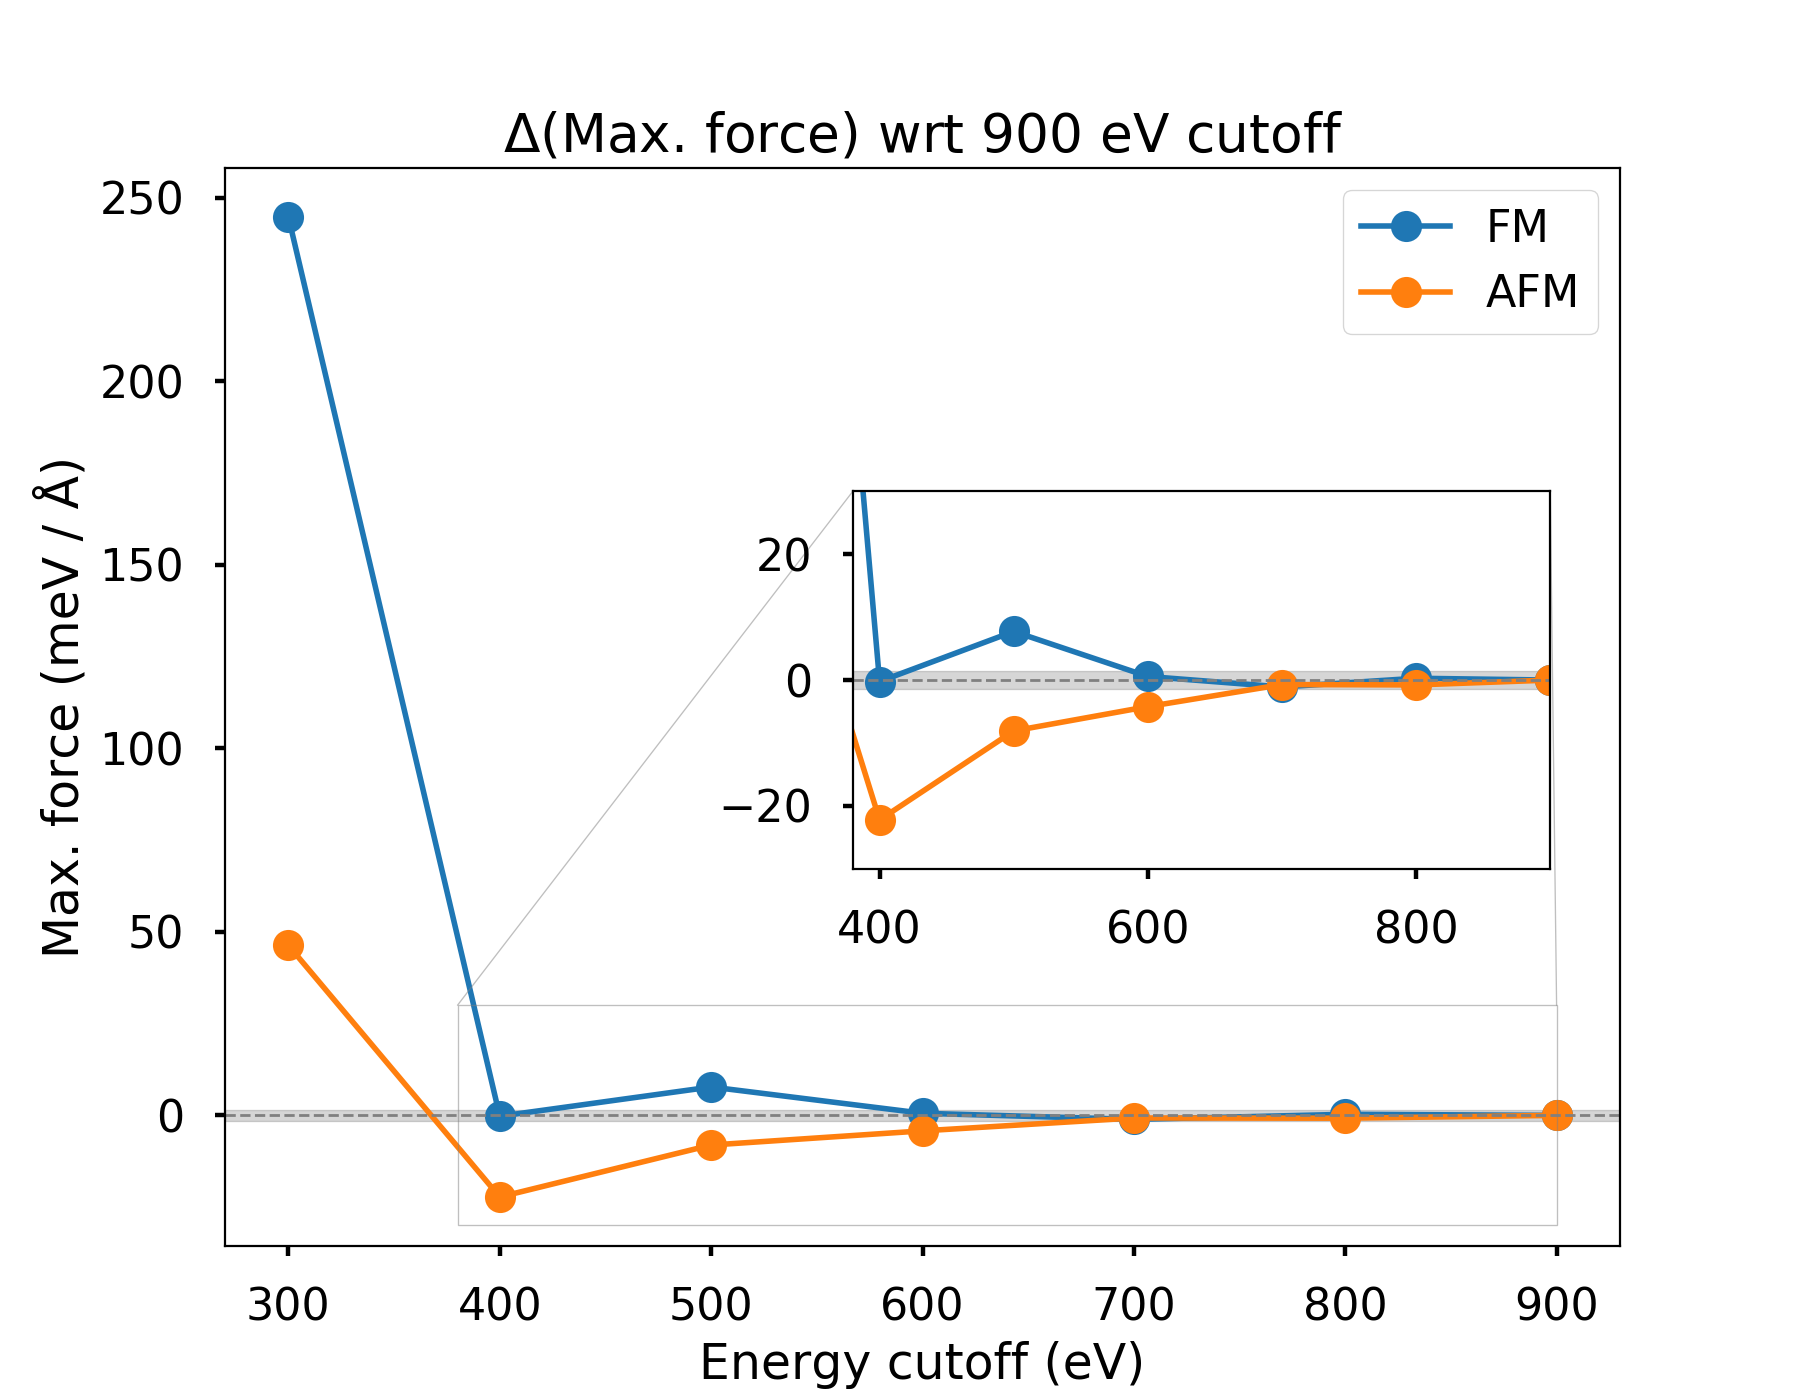

In [32]:
encuts = range(300, 950, 100)

fig, ax = plt.subplots(figsize=(9,7))
# Make the plot
ax.plot(encuts, maxforces_fm - maxforces_fm[-1],
        linewidth = 2, label='FM', marker='o')

ax.plot(encuts, maxforces_afm- maxforces_afm[-1],
        linewidth = 2, label='AFM', marker='o')
# plt.axhline(maxforces_fm[-1], linewidth = 1, color='0.5', linestyle='--')
ax.axhline(0, linewidth = 1, color='0.5', linestyle='--')
ax.axhspan(ymin=-1.5,ymax=1.5, alpha=0.2, color='0.2')


ax.set_xlabel(r"Energy cutoff (eV)")
ax.set_ylabel(r"Max. force (meV / Å)")
ax.set_title(r"$\Delta$(Max. force) wrt 900 eV cutoff")

ax.legend()

# inset axes....
axins = ax.inset_axes([0.45, 0.35, 0.5, 0.35])

# Make the plot
axins.plot(encuts, maxforces_fm - maxforces_fm[-1],
        linewidth = 2, label='FM', marker='o')

axins.plot(encuts, maxforces_afm- maxforces_afm[-1],
        linewidth = 2, label='AFM', marker='o')

axins.axhline(0, linewidth = 1, color='0.5', linestyle='--')
axins.axhspan(ymin=-1.5,ymax=1.5, alpha=0.2, color='0.2')

# sub region of the original image
x1, x2, y1, y2 = 380, 900, -30, 30
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)


ax.indicate_inset_zoom(axins)
print()

Next we show just the AFM total energy convergence w.r.t. to plane wave cut off:

<IPython.core.display.Javascript object>


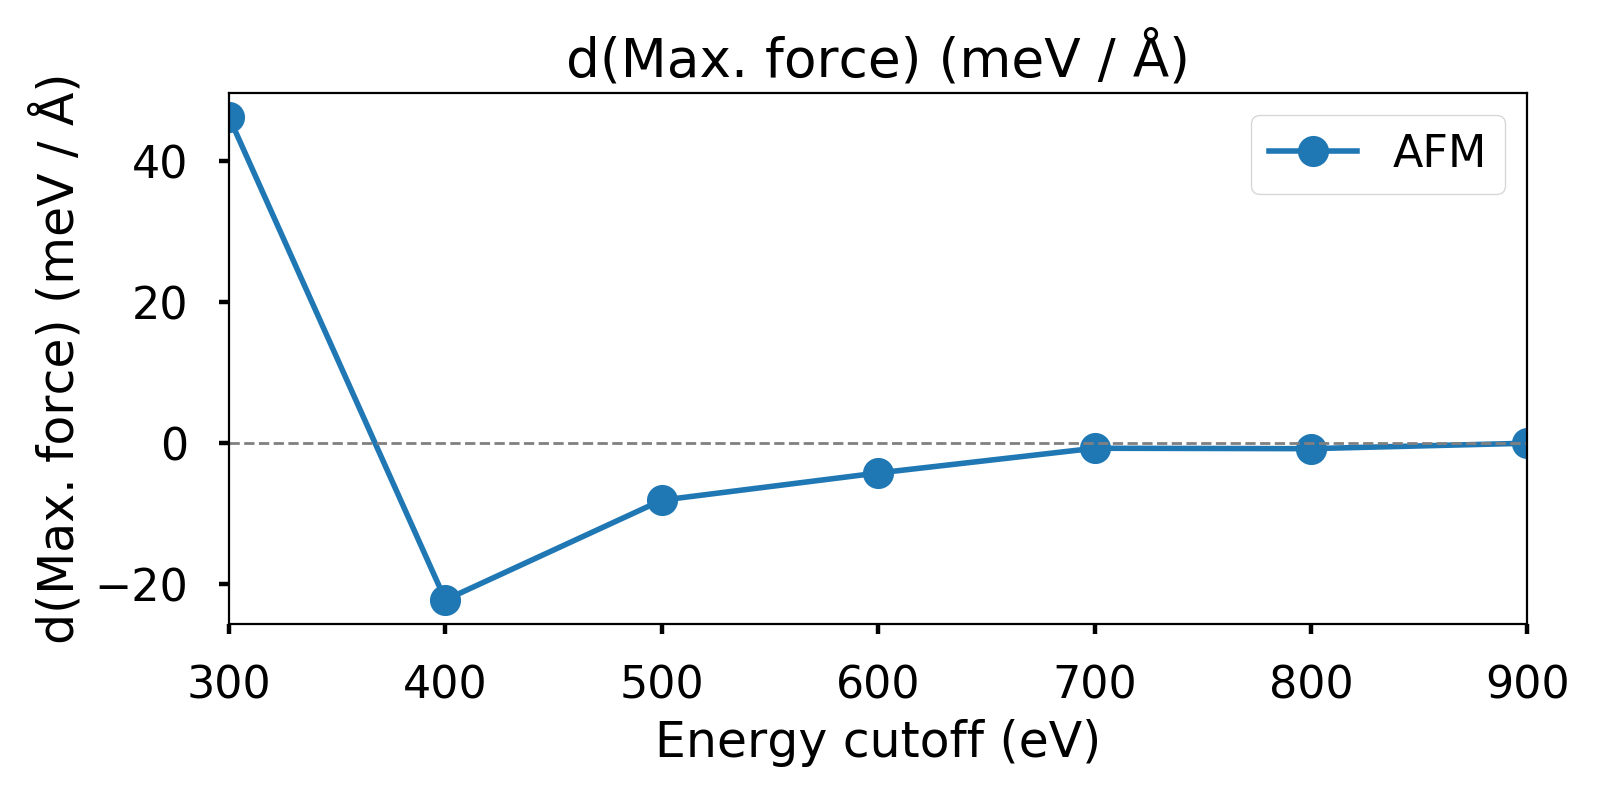

In [41]:
encuts = range(300, 950, 100)

fix = plt.figure(figsize=(8,4))
# Make the plot
plt.plot(encuts, maxforces_afm-maxforces_afm[-1],
        linewidth = 2, label='AFM', marker='o')

plt.axhline(0, linewidth = 1, color='0.5', linestyle='--')


plt.xlabel(r"Energy cutoff (eV)")
plt.ylabel(r"d(Max. force) (meV / Å)")
plt.title(r"d(Max. force) (meV / Å)")
plt.legend()
plt.xlim(300, 900)

plt.tight_layout()

## k-points

Now we present the tests for the convergence of energies, energy differences and forces with respect to the choice of k-point mesh. We use a $\Gamma$-centred uniform k-point mesh.

### AFM - read in results

In [33]:
kpt_runs = []
for k in range(4, 17, 1): # need at least 4 kpts fpr tetrahedron method...

    label = 'convergence_tests/afm_kpoints/kpts-{0:d}-{0:d}-{0:d}-vasprun.xml'.format(k)

    run = Vasprun(label, parse_potcar_file=False)
    kpt_runs.append(run)
    print("k-mesh: {0: >2d} {0: >2d} {0: >2d}, Total energy:  {1}".format(k, run.final_energy))

k-mesh:  4  4  4, Total energy:  -86.65388517 eV
k-mesh:  5  5  5, Total energy:  -86.6539492 eV
k-mesh:  6  6  6, Total energy:  -86.65376287 eV
k-mesh:  7  7  7, Total energy:  -86.65381027 eV
k-mesh:  8  8  8, Total energy:  -86.65394394 eV
k-mesh:  9  9  9, Total energy:  -86.65379679 eV
k-mesh: 10 10 10, Total energy:  -86.65388527 eV
k-mesh: 11 11 11, Total energy:  -86.65402949 eV
k-mesh: 12 12 12, Total energy:  -86.65398456 eV
k-mesh: 13 13 13, Total energy:  -86.65380306 eV
k-mesh: 14 14 14, Total energy:  -86.65397453 eV
k-mesh: 15 15 15, Total energy:  -86.65397631 eV
k-mesh: 16 16 16, Total energy:  -86.65397909 eV


In [34]:
afm_kpt_totens = np.array([run.final_energy for run in kpt_runs])
print(1000*(afm_kpt_totens - afm_kpt_totens[-1]))
# totens

[ 0.09392  0.02989  0.21622  0.16882  0.03515  0.1823   0.09382 -0.0504
 -0.00547  0.17603  0.00456  0.00278  0.     ]


In [35]:

maxforces_kpt_afm = [1000*np.linalg.norm(run.ionic_steps[-1]['forces'], axis=1).max() for run in kpt_runs]
print('max force difference in meV/A ', np.array(maxforces_kpt_afm) - maxforces_kpt_afm[-1])


max force difference in meV/A  [ 0.02058545  0.01086516  0.01782284  0.         -0.00241935  0.01124677
  0.01704998  0.00794402  0.01033197  0.0111326   0.00341311  0.00569821
  0.        ]


### FM - read in results

In [36]:
fm_kpt_runs = []
for k in range(4, 17, 1): # need at least 4 kpts fpr tetrahedron method...

    label = 'convergence_tests/fm_kpoints/kpts-{0:d}-{0:d}-{0:d}-vasprun.xml'.format(k)

    run = Vasprun(label, parse_potcar_file=False)
    fm_kpt_runs.append(run)
    print("k-mesh: {0: >2d} {0: >2d} {0: >2d}, Total energy:  {1}".format(k, run.final_energy))
    
fm_kpt_totens = np.array([run.final_energy for run in fm_kpt_runs])

k-mesh:  4  4  4, Total energy:  -86.42709211 eV
k-mesh:  5  5  5, Total energy:  -86.42716587 eV
k-mesh:  6  6  6, Total energy:  -86.42698494 eV
k-mesh:  7  7  7, Total energy:  -86.42703469 eV
k-mesh:  8  8  8, Total energy:  -86.42716732 eV
k-mesh:  9  9  9, Total energy:  -86.42701933 eV
k-mesh: 10 10 10, Total energy:  -86.42711044 eV
k-mesh: 11 11 11, Total energy:  -86.42725506 eV
k-mesh: 12 12 12, Total energy:  -86.42721039 eV
k-mesh: 13 13 13, Total energy:  -86.427027 eV
k-mesh: 14 14 14, Total energy:  -86.42720041 eV
k-mesh: 15 15 15, Total energy:  -86.42720175 eV
k-mesh: 16 16 16, Total energy:  -86.42720482 eV


In [37]:
# extract the maximum force for each case wrt to the max force in the 16x16x16 case:
maxforces_kpt_fm = [1000*np.linalg.norm(run.ionic_steps[-1]['forces'], axis=1).max() for run in fm_kpt_runs]
print('max force difference in meV/A ', np.array(maxforces_kpt_fm) - maxforces_kpt_fm[-1])


max force difference in meV/A  [-0.04214613  0.0868538  -0.00355948 -0.00294355  0.02382711 -0.05679954
 -0.04942197  0.00993806  0.01450058 -0.01445933 -0.02560332 -0.00499423
  0.        ]


### Plots

#### Total energy and energy differences

In [38]:
kpt_diffs = afm_kpt_totens - fm_kpt_totens # toten diffs in eV
kpt_diffs *= 500 # -> meV per fu
kpts = range(4, 17, 1)

<IPython.core.display.Javascript object>


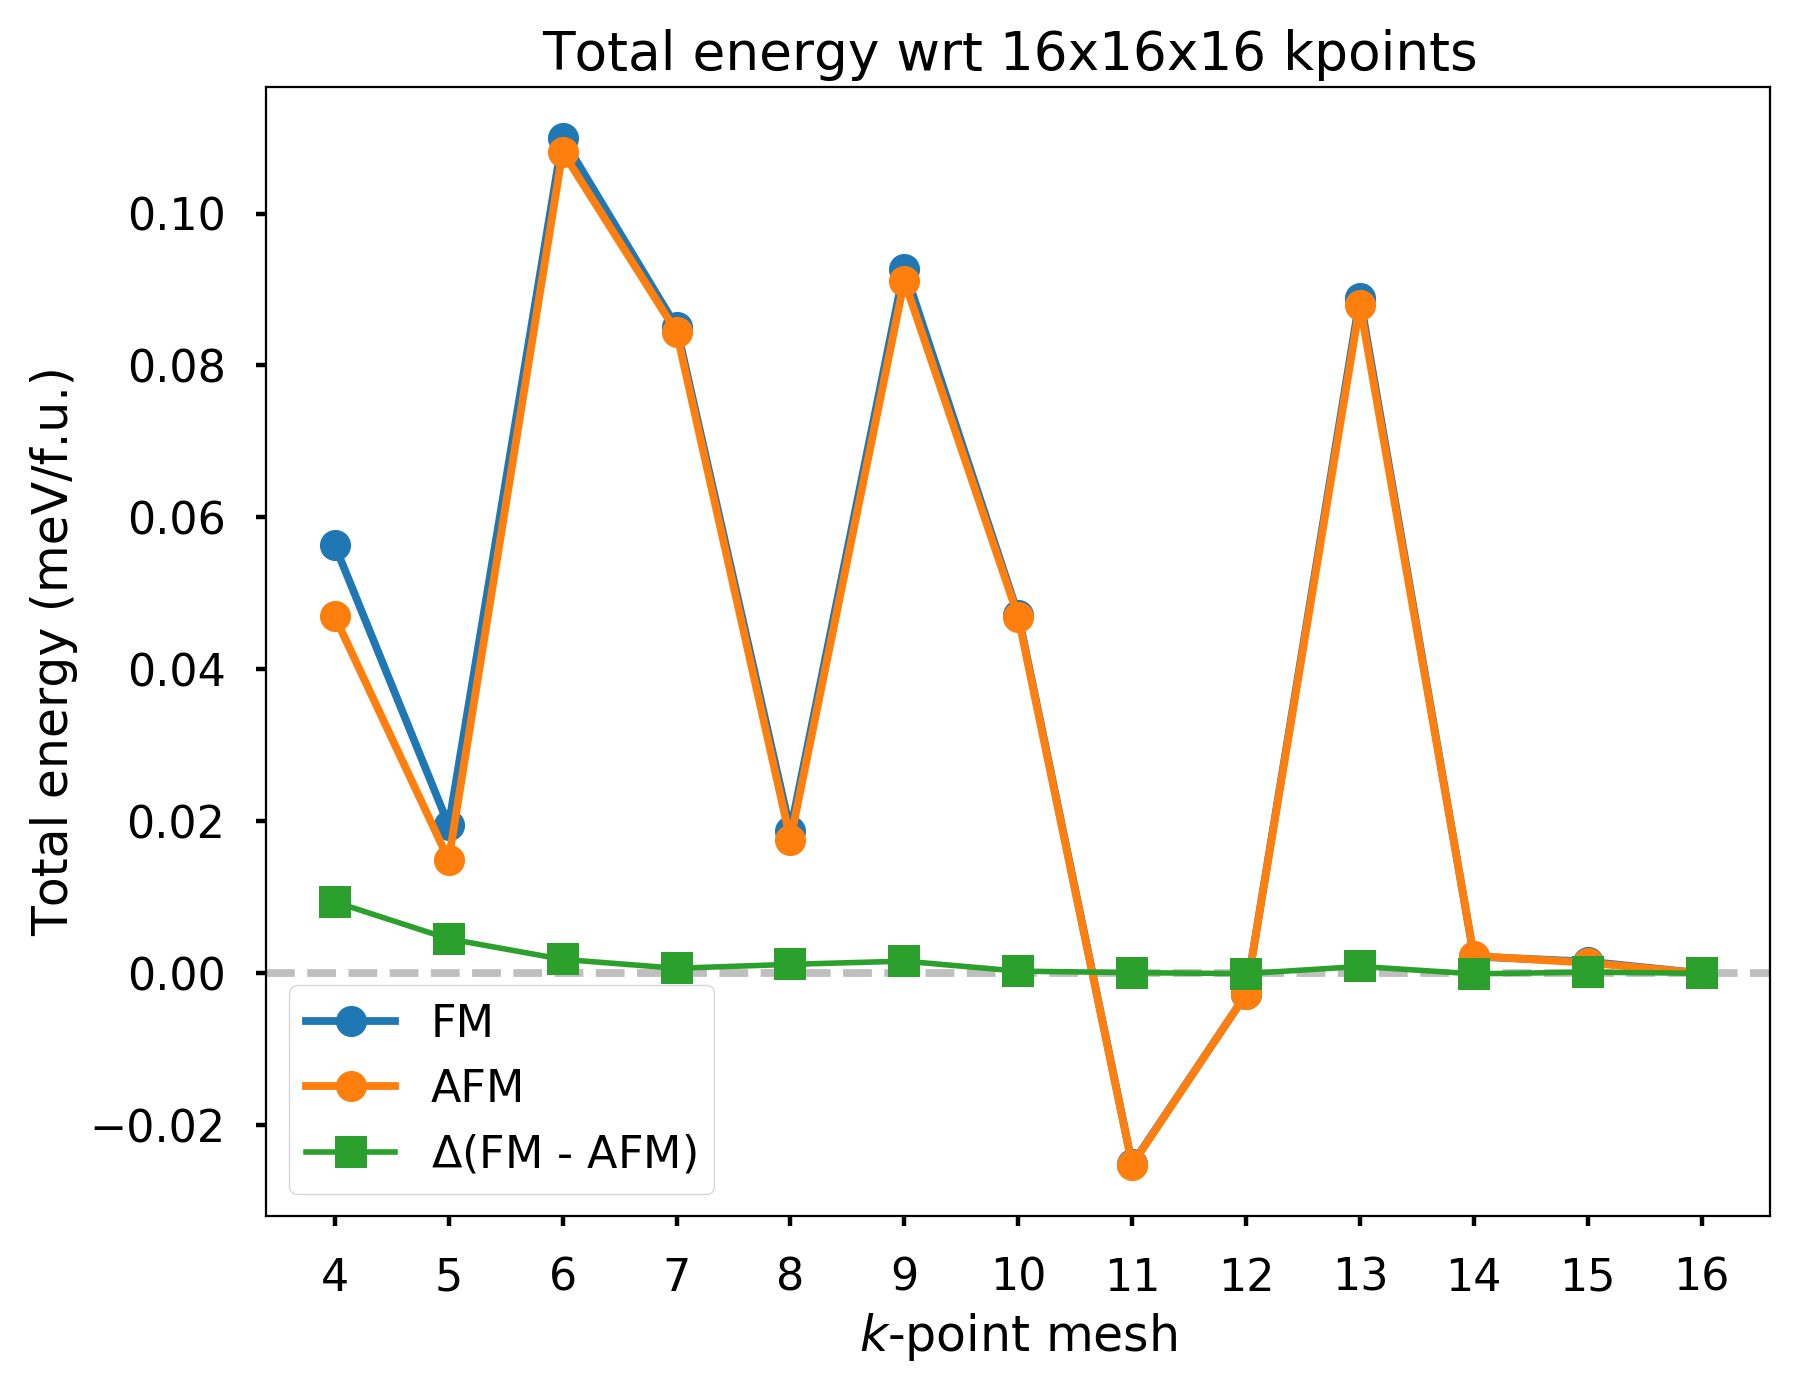

In [39]:
##############################
### ---      Plot       ---###
fig, ax1 = plt.subplots(figsize=(9,7))

ax1.axhline(0, linestyle='--', color='0.75')

# plot total energies wrt encut, in meV per f.u.
ax1.plot(kpts, 500*(fm_kpt_totens - fm_kpt_totens[-1]),marker='o', color='C0',label='FM')
ax1.plot(kpts, 500*(afm_kpt_totens - afm_kpt_totens[-1]),marker='o', color='C1',label='AFM')
ax1.plot(kpts, 1000*(fm_kpt_totens-afm_kpt_totens - (fm_kpt_totens-afm_kpt_totens)[-1])/2, marker='s',
        linewidth = 2, label = r'$\Delta$(FM - AFM)',color='C2')


ax1.set_xlabel('$k$-point mesh')
ax1.set_ylabel('Total energy (meV/f.u.)')#, color='C0')
ax1.set_title('Total energy wrt 16x16x16 kpoints ')
ax1.legend()

ax1.set_xticks(kpts)
fig.tight_layout()
fig.show()
##############################

#### Forces

Here we plot the maximum force with respect to the $16\times16\times16$ k-point mesh. 

<IPython.core.display.Javascript object>


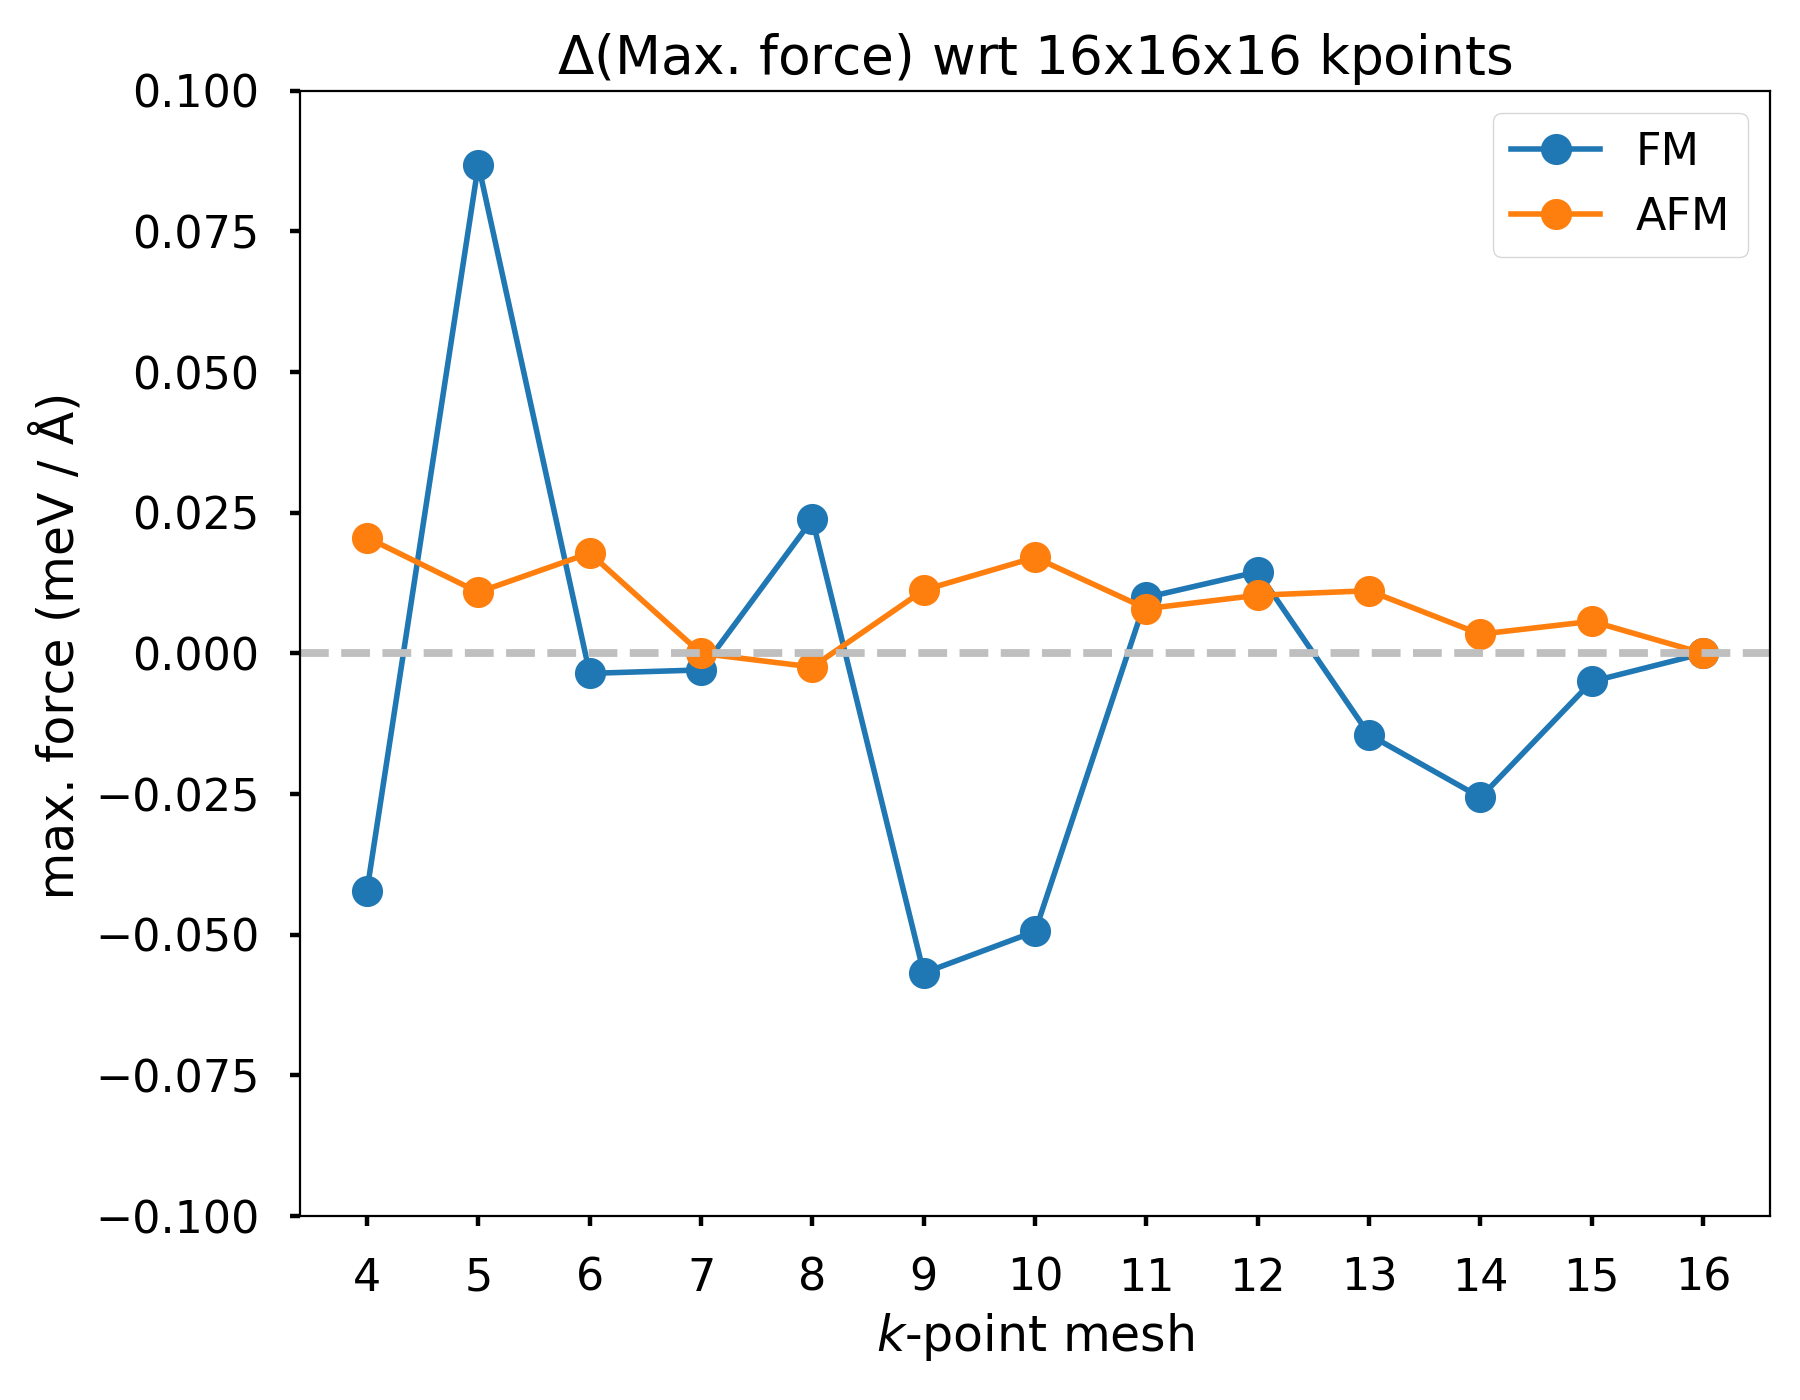

In [40]:
kpts = range(4, 17, 1)

fix = plt.figure(figsize=(9,7))
# Make the plot
plt.plot(kpts, maxforces_kpt_fm - maxforces_kpt_fm[-1], marker = 'o', linewidth = 2,label='FM')
plt.plot(kpts, maxforces_kpt_afm - maxforces_kpt_afm[-1], marker = 'o', linewidth = 2,label='AFM')

plt.axhline(0, color='0.75', linestyle='--')
plt.xlabel(r"$k$-point mesh")
plt.ylabel(r" max. force (meV / Å)")
plt.title(r"$\Delta$(Max. force) wrt 16x16x16 kpoints")

plt.xticks(kpts)
plt.ylim(-0.1, 0.1)

plt.legend()

plt.tight_layout()
